In [2]:
# BINARY CLASSFIACTION (WITH TEXT , NO TEXT , WITH TICKER  ,NO TICKER) ALL IN ONE

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('final_dataset.csv')
df.head()  

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,operatingCashFlowSalesRatio,payablesTurnover,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Readability
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.058638,3.906655,1.514332,1.045610,1.820804,1.225888,0.216333,0.450694,0.946458,10.72
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.067239,4.002846,2.379140,0.875523,1.617815,1.427484,0.209364,0.399695,0.590027,10.31
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,03-06-2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.074426,3.483510,2.555911,0.778754,1.757188,1.357827,0.139776,0.399361,0.459265,10.48
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,0.028394,4.581150,2.580837,1.275586,1.483239,1.216256,0.148324,0.355977,0.504301,11.19
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.058065,3.857790,1.231846,1.154046,2.035788,0.635373,0.207469,0.414938,0.920643,11.21


In [4]:
df['Rating'] = df['Rating'].apply(lambda x: 1 if x in ['AAA', 'BBB', 'AA', 'A'] else 0)

In [5]:
import numpy as np
np.unique(df["Rating"])

array([0, 1], dtype=int64)

In [6]:
df["Rating"].value_counts()

Rating
1    918
0    571
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sector'] = label_encoder.fit_transform(df['Sector'])

label_encoder2 = LabelEncoder()
df['Symbol'] = label_encoder.fit_transform(df['Symbol'])


In [8]:
df.drop(["Name" , "Date" , "Rating Agency Name"] , axis = 1 , inplace = True)

In [9]:
columns_to_standardize = df.columns[1:]
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df.to_csv('standardized_dataset.csv', index=False)

In [10]:
X = df.drop(["Rating"] , axis = 1)
y = df["Rating"]

In [11]:
# ! pip install catboost xgboost lightgbm

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score

In [13]:
Model_list = {
    "CatBoost":0,
    "KNN-Unif":1,
    "KNN-Dist":	2,
	"ExtraTrees-Entr":3,	
	"ExtraTrees-Gini":4,	
	"LightGBM":5,
	"RForest-Ent":6,	
	"RForest-Gini":7,	
	"XGBoost":8,
	"Ensemble":9,	
}

In [14]:
def Logistic(X_train,X_test , y_train , y_test):
    logistic_regression = LogisticRegression(max_iter=10000)
    logistic_regression.fit(X_train, y_train)
    y_pred = logistic_regression.predict(X_test)
    return accuracy_score(y_test,y_pred)


def Svm(X_train,X_test , y_train , y_test):
    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    # print(confusion_matrix(y_test, y_pred))
    return accuracy_score(y_test,y_pred)

def catboost(X_train,X_test , y_train , y_test):
    catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=False)
    catboost_model.fit(X_train, y_train)
    y_pred_catboost = catboost_model.predict(X_test)
    return accuracy_score(y_test, y_pred_catboost)
    # conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)

def xgboost(X_train,X_test , y_train , y_test):
    xgboost_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='mlogloss')
    xgboost_model.fit(X_train, y_train)
    y_pred_xgboost = xgboost_model.predict(X_test)
    return accuracy_score(y_test, y_pred_xgboost)

# # 3. LightGBM
def lightgbm(X_train,X_test , y_train , y_test):
    lightgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3 , verbose = -1)
    lightgbm_model.fit(X_train, y_train)
    y_pred_lightgbm = lightgbm_model.predict(X_test)
    return accuracy_score(y_test, y_pred_lightgbm)

def lightgbm_xt(X_train, X_test, y_train, y_test):
    params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',        # Adjust this for multi-class
        'extra_trees': True,          # Enables extra trees mode
        'num_leaves': 31,
        'learning_rate': 0.05,
        'n_estimators': 100,
        'random_state': 42
    }
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Function for LightGBMLarge (optimized for large datasets)
def lightgbm_large(X_train, X_test, y_train, y_test):
    params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',        # Adjust this for multi-class
        'num_leaves': 255,            # Increased to handle large data
        'learning_rate': 0.01,        # Lower learning rate
        'n_estimators': 1000,         # More trees for larger datasets
        'max_depth': -1,              # Allow deeper trees
        'random_state': 42
    }
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)


def random_forest_gini(X_train, X_test, y_train, y_test):
    rf_gini_model = RandomForestClassifier(criterion='gini', max_depth=6, random_state=42)
    rf_gini_model.fit(X_train, y_train)
    y_pred_gini = rf_gini_model.predict(X_test)
    return accuracy_score(y_test, y_pred_gini)

def random_forest_entropy(X_train, X_test, y_train, y_test):
    rf_entropy_model = RandomForestClassifier(criterion='entropy', max_depth=6, random_state=42)
    rf_entropy_model.fit(X_train, y_train)
    y_pred_entropy = rf_entropy_model.predict(X_test)
    return accuracy_score(y_test, y_pred_entropy)


def decision_tree(X_train,X_test , y_train , y_test):
    dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    return accuracy_score(y_test, y_pred_dt)


def extratree_gini(X_train, X_test, y_train, y_test):
    et_gini_model = ExtraTreesClassifier(criterion='gini', max_depth=6, random_state=42)
    et_gini_model.fit(X_train, y_train)
    y_pred_gini = et_gini_model.predict(X_test)
    return accuracy_score(y_test, y_pred_gini)

def extratree_entropy(X_train, X_test, y_train, y_test):
    et_entropy_model = ExtraTreesClassifier(criterion='entropy', max_depth=6, random_state=42)
    et_entropy_model.fit(X_train, y_train)
    y_pred_entropy = et_entropy_model.predict(X_test)
    return accuracy_score(y_test, y_pred_entropy)


def knn_unif(X_train, X_test, y_train, y_test):
    knn_unif_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')  # Uniform weights
    knn_unif_model.fit(X_train, y_train)
    y_pred_unif = knn_unif_model.predict(X_test)
    return accuracy_score(y_test, y_pred_unif)

def knn_dist(X_train, X_test, y_train, y_test):
    knn_dist_model = KNeighborsClassifier(n_neighbors=5, weights='distance')  # Distance-based weights
    knn_dist_model.fit(X_train, y_train)
    y_pred_dist = knn_dist_model.predict(X_test)
    return accuracy_score(y_test, y_pred_dist)

In [15]:
def stack_ensemble(X_train,X_test , y_train , y_test):
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Define base models
    base_models = [
        ("catboost", CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=False)),
        ("lightgbm", LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=6 , verbose = -1)),
        ("random_forest", RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42))
    ]

    stack_train = np.zeros((X_train.shape[0], len(base_models)))
    stack_test = np.zeros((X_test.shape[0], len(base_models)))

    # Stratified K-Folds for base models
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Train each base model and store their predictions for stacking
    for i, (name, model) in enumerate(base_models):
        fold_train = np.zeros((X_train.shape[0],))  
        fold_test = np.zeros((X_test.shape[0], 5)) 

        for j, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
            # Split data using the indices provided by K-Fold
            X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
            y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

            # Fit the model on this fold
            model.fit(X_fold_train, y_fold_train)

            # Predict validation set (for stacking), flatten the predictions to avoid shape mismatch
            fold_train[val_idx] = model.predict(X_fold_val).ravel()

            fold_test[:, j] = model.predict(X_test).ravel()

        stack_train[:, i] = fold_train
        stack_test[:, i] = fold_test.mean(axis=1)

    stacker = LogisticRegression()
    stacker.fit(stack_train, y_train)

    final_predictions = stacker.predict(stack_test)
    return accuracy_score(y_test, final_predictions)

In [16]:
import warnings
warnings.filterwarnings('ignore')

def run_model(X,y , text , table , name_of_csv):
    X_train,X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)
    # print(X_train.shape , X_test.shape , y_train.shape , y_test.shape )
    table.loc[0, text] = 100*catboost(X_train,X_test , y_train , y_test)
    table.loc[1, text] = 100*extratree_entropy(X_train,X_test , y_train , y_test)
    table.loc[2, text] = 100*extratree_gini(X_train,X_test , y_train , y_test)
    table.loc[3, text] = 100*knn_dist(X_train,X_test , y_train , y_test)
    table.loc[4, text] = 100*knn_unif(X_train,X_test , y_train , y_test)
    table.loc[5, text] = 100*lightgbm(X_train,X_test , y_train , y_test)
    table.loc[6, text] = 100*lightgbm_large(X_train,X_test , y_train , y_test)
    table.loc[7, text] = 100*lightgbm_xt(X_train,X_test , y_train , y_test)
    table.loc[8, text] = 100*random_forest_entropy(X_train,X_test , y_train , y_test)
    table.loc[9, text] = 100*random_forest_gini(X_train,X_test , y_train , y_test)
    table.loc[10, text] = 100*xgboost(X_train,X_test , y_train , y_test)
    table.loc[11, text] = 100*stack_ensemble(X_train,X_test , y_train , y_test)

    table.to_csv(name_of_csv ,index=False)
    return table

In [17]:
filename = "binaryclass_with_ticker.csv"
table = pd.read_csv("comparative_analysis.csv")
run_model(X,y , "NLP", table , filename) # nlp extracted features used 

X = X.drop(["Negative","Positive","Uncertainty","Litigious","Strong_Modal","Weak_Modal","Constraining","Readability"] ,axis = 1)

table2 = pd.read_csv(filename)
run_model(X ,y , "No text" , table2 ,filename)   # no nlp extracted features used 

Result1 = pd.read_csv(filename)
Result1

,Model,No text,NLP
0,CatBoost,84.563758,83.221477
1,ExtraTrees-Entr,67.785235,67.785235
2,ExtraTrees-Gini,68.456376,67.449664
3,KNN-Dist,82.214765,76.174497
4,KNN-Unif,79.530201,74.832215
5,LightGBM,84.228188,83.892617
6,LightGBM-Large,88.255034,85.906040
7,LightGBM-XT,83.221477,83.892617
8,RForest-Ent,80.872483,80.201342
9,RForest-Gini,80.201342,80.201342


Epoch 1/80
38/38 [==============================] - 1s 10ms/step - loss: 0.6600 - accuracy: 0.6306 - val_loss: 0.6229 - val_accuracy: 0.7081
Epoch 2/80
38/38 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.7204 - val_loss: 0.5805 - val_accuracy: 0.7349
Epoch 3/80
38/38 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7422 - val_loss: 0.5568 - val_accuracy: 0.7517
Epoch 4/80
38/38 [==============================] - 0s 2ms/step - loss: 0.5160 - accuracy: 0.7590 - val_loss: 0.5658 - val_accuracy: 0.7550
Epoch 5/80
38/38 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.7817 - val_loss: 0.5573 - val_accuracy: 0.7785
Epoch 6/80
38/38 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.7918 - val_loss: 0.6053 - val_accuracy: 0.7785
Epoch 7/80
38/38 [==============================] - 0s 4ms/step - loss: 0.4523 - accuracy: 0.7926 - val_loss: 0.5873 - val_accuracy: 0.7852
Epoch 8/80
38/38 [=

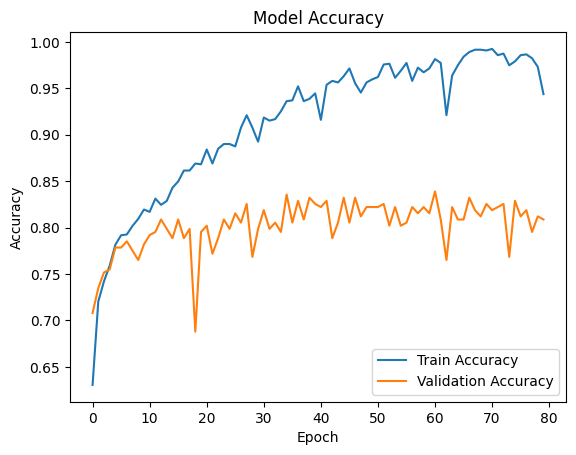

Epoch 1/90
38/38 [==============================] - 2s 18ms/step - loss: 0.6766 - accuracy: 0.6096 - val_loss: 0.6447 - val_accuracy: 0.6477
Epoch 2/90
38/38 [==============================] - 0s 13ms/step - loss: 0.6578 - accuracy: 0.6087 - val_loss: 0.6426 - val_accuracy: 0.6477
Epoch 3/90
38/38 [==============================] - 0s 12ms/step - loss: 0.6389 - accuracy: 0.6087 - val_loss: 0.6075 - val_accuracy: 0.6477
Epoch 4/90
38/38 [==============================] - 0s 12ms/step - loss: 0.6442 - accuracy: 0.6087 - val_loss: 0.6197 - val_accuracy: 0.6477
Epoch 5/90
38/38 [==============================] - 0s 12ms/step - loss: 0.7228 - accuracy: 0.6087 - val_loss: 0.6322 - val_accuracy: 0.6477
Epoch 6/90
38/38 [==============================] - 0s 12ms/step - loss: 0.6662 - accuracy: 0.6113 - val_loss: 0.6235 - val_accuracy: 0.6477
Epoch 7/90
38/38 [==============================] - 0s 12ms/step - loss: 0.6462 - accuracy: 0.6087 - val_loss: 0.6314 - val_accuracy: 0.6477
Epoch 8/90
38

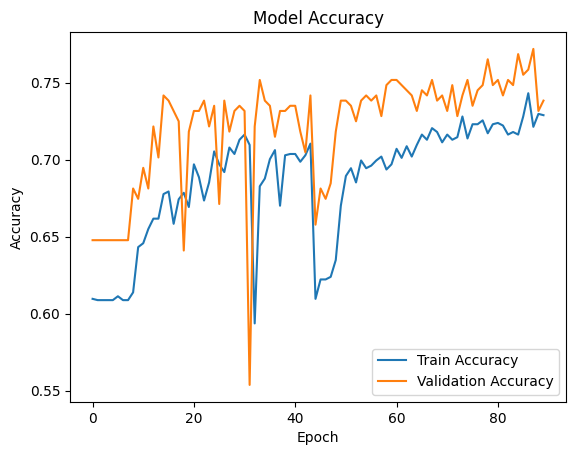

In [ ]:
accuracies_dict ={}


In [42]:
accuracies_dict

{'ANN': 81.8791925907135,
 'LSTM': 78.1879186630249,
 'Bidirectional': 76.17449760437012,
 'Simple RNN': 83.22147727012634,
 'GRU': 81.54362440109253,
 'CNN': 83.55704545974731,
 'Attention models': 64.76510167121887}

Epoch 1/200
38/38 [==============================] - 1s 7ms/step - loss: 0.6363 - accuracy: 0.6641 - val_loss: 0.5773 - val_accuracy: 0.7517
Epoch 2/200
38/38 [==============================] - 0s 3ms/step - loss: 0.5697 - accuracy: 0.7380 - val_loss: 0.5494 - val_accuracy: 0.7315
Epoch 3/200
38/38 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7666 - val_loss: 0.5226 - val_accuracy: 0.7517
Epoch 4/200
38/38 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.7380 - val_loss: 0.5266 - val_accuracy: 0.7349
Epoch 5/200
38/38 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7758 - val_loss: 0.5522 - val_accuracy: 0.7852
Epoch 6/200
38/38 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.7926 - val_loss: 0.5259 - val_accuracy: 0.7785
Epoch 7/200
38/38 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.7935 - val_loss: 0.5460 - val_accuracy: 0.7215
Epoch 8/200
3

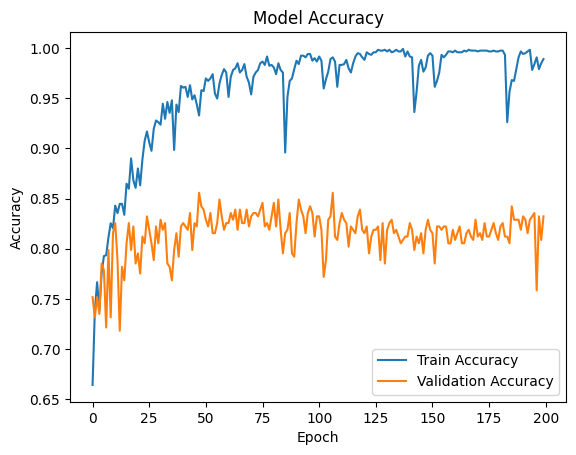

In [44]:
#  ANN trained model 

X_train,X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


y_train_1 = to_categorical(y_train, num_classes=2)
y_test_1 = to_categorical(y_test, num_classes=2)

# Define the model
ann_trained_model = Sequential()

# Input and Hidden Layers
ann_trained_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
ann_trained_model.add(Dense(64, activation='relu'))
ann_trained_model.add(Dense(32, activation='relu'))
ann_trained_model.add(Dense(64, activation='relu'))
ann_trained_model.add(Dense(32, activation='relu'))
ann_trained_model.add(Dense(16, activation='relu'))
ann_trained_model.add(Dense(8, activation='relu'))
# Output Layer
ann_trained_model.add(Dense(2, activation='softmax'))  # 2 classes

# Compile the model
ann_trained_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = ann_trained_model.fit(X_train, y_train_1, epochs=200 , batch_size=32, validation_data=(X_test, y_test_1), verbose=1)

# Evaluate the model
loss, accuracy = ann_trained_model.evaluate(X_test, y_test_1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

accuracies_dict['ANN'] = accuracy * 100


# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Epoch 1/100
38/38 [==============================] - 3s 22ms/step - loss: 0.6772 - accuracy: 0.6104 - val_loss: 0.6442 - val_accuracy: 0.6510
Epoch 2/100
38/38 [==============================] - 1s 15ms/step - loss: 0.6701 - accuracy: 0.6113 - val_loss: 0.6246 - val_accuracy: 0.6577
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.6543 - accuracy: 0.6440 - val_loss: 0.6174 - val_accuracy: 0.6644
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.6496 - accuracy: 0.6280 - val_loss: 0.5962 - val_accuracy: 0.6913
Epoch 5/100
38/38 [==============================] - 1s 14ms/step - loss: 0.6340 - accuracy: 0.6482 - val_loss: 0.6035 - val_accuracy: 0.6812
Epoch 6/100
38/38 [==============================] - 1s 16ms/step - loss: 0.6286 - accuracy: 0.6406 - val_loss: 0.6085 - val_accuracy: 0.7248
Epoch 7/100
38/38 [==============================] - 1s 13ms/step - loss: 0.6307 - accuracy: 0.6616 - val_loss: 0.5817 - val_accuracy: 0.6946
Epoch 

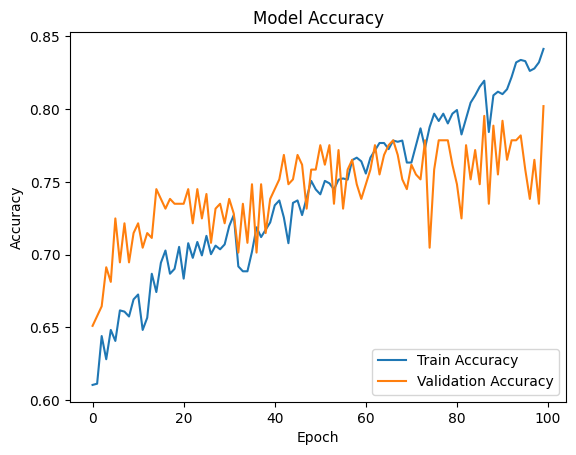

In [45]:
#  LSTM rnn model 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import LSTM


y_train_1 = to_categorical(y_train, num_classes=2)
y_test_1 = to_categorical(y_test, num_classes=2)

# Define the model
lstm_trained_model = Sequential()

# Input and Hidden Layers
# model.add(LSTM(32,activation='relu',input_shape=(27)))
# model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
lstm_trained_model.add(LSTM(100, activation='relu',input_shape=(X_train.shape[1], 1)))
lstm_trained_model.add(Dense(64, activation='relu'))
lstm_trained_model.add(Dense(32, activation='relu'))
lstm_trained_model.add(Dense(64, activation='relu'))
lstm_trained_model.add(Dense(32, activation='relu'))
lstm_trained_model.add(Dense(16, activation='relu'))
lstm_trained_model.add(Dense(8, activation='relu'))
# Output Layer
lstm_trained_model.add(Dense(2, activation='softmax'))  # 2 classes

# Compile the model
lstm_trained_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = lstm_trained_model.fit(X_train, y_train_1, epochs=100 , batch_size=32, validation_data=(X_test, y_test_1), verbose=1)

# Evaluate the model
loss, accuracy = lstm_trained_model.evaluate(X_test, y_test_1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

accuracies_dict['LSTM'] = accuracy * 100

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Epoch 1/250
38/38 [==============================] - 3s 25ms/step - loss: 0.6832 - accuracy: 0.6037 - val_loss: 0.6520 - val_accuracy: 0.6477
Epoch 2/250
38/38 [==============================] - 1s 19ms/step - loss: 0.6702 - accuracy: 0.6087 - val_loss: 0.6469 - val_accuracy: 0.6477
Epoch 3/250
38/38 [==============================] - 1s 17ms/step - loss: 0.6630 - accuracy: 0.6121 - val_loss: 0.6358 - val_accuracy: 0.6477
Epoch 4/250
38/38 [==============================] - 1s 18ms/step - loss: 1.4674 - accuracy: 0.6280 - val_loss: 0.6229 - val_accuracy: 0.6745
Epoch 5/250
38/38 [==============================] - 1s 17ms/step - loss: 1.1492 - accuracy: 0.6516 - val_loss: 0.6145 - val_accuracy: 0.6913
Epoch 6/250
38/38 [==============================] - 1s 17ms/step - loss: 0.6489 - accuracy: 0.6641 - val_loss: 0.6119 - val_accuracy: 0.7047
Epoch 7/250
38/38 [==============================] - 1s 17ms/step - loss: 0.6167 - accuracy: 0.6700 - val_loss: 0.5985 - val_accuracy: 0.6980
Epoch 

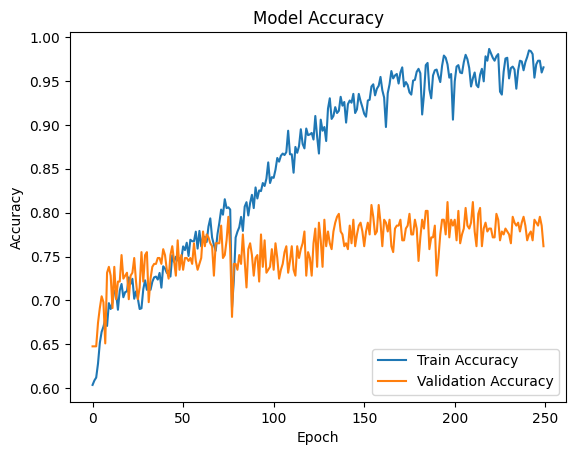

In [ ]:
#  birectional rnn 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# One-hot encoding for the target labels
y_train_1 = to_categorical(y_train, num_classes=2)
y_test_1 = to_categorical(y_test, num_classes=2)

# Define the model
model = Sequential()

# Input and Bidirectional LSTM Layers
model.add(Bidirectional(LSTM(100, activation='relu', return_sequences=False), input_shape=(X_train.shape[1], 1)))

# Fully Connected Layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output Layer
model.add(Dense(2, activation='softmax'))  # 2 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_1, epochs=150, batch_size=32, validation_data=(X_test, y_test_1), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

accuracies_dict["Bidirectional"] = accuracy*100

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


Epoch 1/200
38/38 [==============================] - 1s 9ms/step - loss: 0.6133 - accuracy: 0.6692 - val_loss: 0.5585 - val_accuracy: 0.7550
Epoch 2/200
38/38 [==============================] - 0s 5ms/step - loss: 0.5757 - accuracy: 0.7078 - val_loss: 0.5538 - val_accuracy: 0.7483
Epoch 3/200
38/38 [==============================] - 0s 4ms/step - loss: 0.5501 - accuracy: 0.7330 - val_loss: 0.5377 - val_accuracy: 0.7483
Epoch 4/200
38/38 [==============================] - 0s 5ms/step - loss: 0.5426 - accuracy: 0.7322 - val_loss: 0.5282 - val_accuracy: 0.7550
Epoch 5/200
38/38 [==============================] - 0s 5ms/step - loss: 0.5366 - accuracy: 0.7347 - val_loss: 0.5850 - val_accuracy: 0.6980
Epoch 6/200
38/38 [==============================] - 0s 5ms/step - loss: 0.5705 - accuracy: 0.7045 - val_loss: 0.5525 - val_accuracy: 0.7282
Epoch 7/200
38/38 [==============================] - 0s 4ms/step - loss: 0.5434 - accuracy: 0.7313 - val_loss: 0.5263 - val_accuracy: 0.7450
Epoch 8/200
3

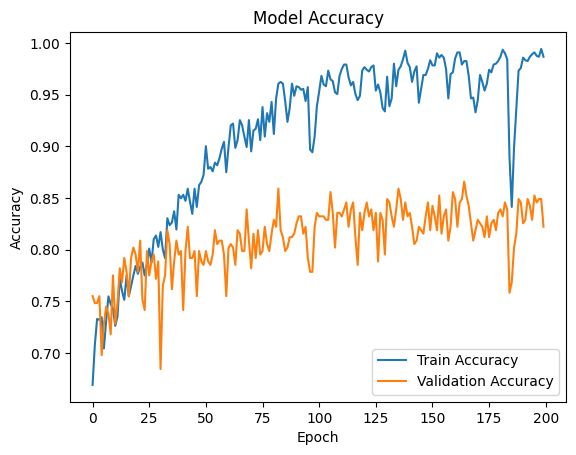

In [46]:
#  simple rnn

from tensorflow.keras.layers import SimpleRNN

# Define the RNN model
rnn_trained_model = Sequential()
rnn_trained_model.add(SimpleRNN(100, activation='tanh', input_shape=(X_train.shape[1], 1)))
rnn_trained_model.add(Dense(64, activation='relu'))
rnn_trained_model.add(Dense(2, activation='softmax'))

# Compile and train as usual
rnn_trained_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = rnn_trained_model.fit(X_train, y_train_1, epochs=200, batch_size=32, validation_data=(X_test, y_test_1))

# Evaluate the model
loss, accuracy = rnn_trained_model.evaluate(X_test, y_test_1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

accuracies_dict["Simple RNN"] = accuracy*100

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


Epoch 1/200
38/38 [==============================] - 31s 20ms/step - loss: 0.6779 - accuracy: 0.5987 - val_loss: 0.6503 - val_accuracy: 0.6477
Epoch 2/200
38/38 [==============================] - 0s 13ms/step - loss: 0.6699 - accuracy: 0.6129 - val_loss: 0.6504 - val_accuracy: 0.6510
Epoch 3/200
38/38 [==============================] - 0s 13ms/step - loss: 0.6681 - accuracy: 0.6121 - val_loss: 0.6473 - val_accuracy: 0.6544
Epoch 4/200
38/38 [==============================] - 0s 13ms/step - loss: 0.6666 - accuracy: 0.6146 - val_loss: 0.6411 - val_accuracy: 0.6577
Epoch 5/200
38/38 [==============================] - 0s 12ms/step - loss: 0.6645 - accuracy: 0.6146 - val_loss: 0.6355 - val_accuracy: 0.6644
Epoch 6/200
38/38 [==============================] - 1s 13ms/step - loss: 0.6399 - accuracy: 0.6432 - val_loss: 0.5933 - val_accuracy: 0.7148
Epoch 7/200
38/38 [==============================] - 0s 12ms/step - loss: 0.6065 - accuracy: 0.6885 - val_loss: 0.5993 - val_accuracy: 0.7013
Epoch

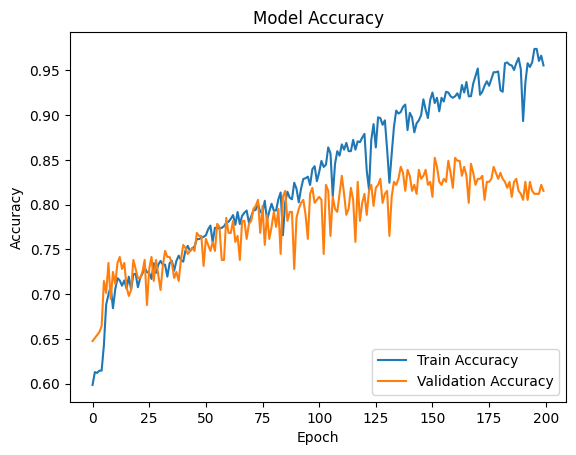

In [30]:
from tensorflow.keras.layers import GRU

# Define the GRU model
model = Sequential()
model.add(GRU(100, activation='tanh', input_shape=(X_train.shape[1], 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile and train
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_1, epochs=200, batch_size=32, validation_data=(X_test, y_test_1))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

accuracies_dict["GRU"] = accuracy*100

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


Epoch 1/200
38/38 [==============================] - 1s 6ms/step - loss: 0.6599 - accuracy: 0.6457 - val_loss: 0.6051 - val_accuracy: 0.7517
Epoch 2/200
38/38 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.7196 - val_loss: 0.5537 - val_accuracy: 0.7584
Epoch 3/200
38/38 [==============================] - 0s 3ms/step - loss: 0.5816 - accuracy: 0.7296 - val_loss: 0.5524 - val_accuracy: 0.7584
Epoch 4/200
38/38 [==============================] - 0s 3ms/step - loss: 0.5655 - accuracy: 0.7347 - val_loss: 0.5494 - val_accuracy: 0.7685
Epoch 5/200
38/38 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.7322 - val_loss: 0.5530 - val_accuracy: 0.7517
Epoch 6/200
38/38 [==============================] - 0s 3ms/step - loss: 0.5492 - accuracy: 0.7355 - val_loss: 0.5290 - val_accuracy: 0.7617
Epoch 7/200
38/38 [==============================] - 0s 3ms/step - loss: 0.5386 - accuracy: 0.7372 - val_loss: 0.5354 - val_accuracy: 0.7584
Epoch 8/200
3

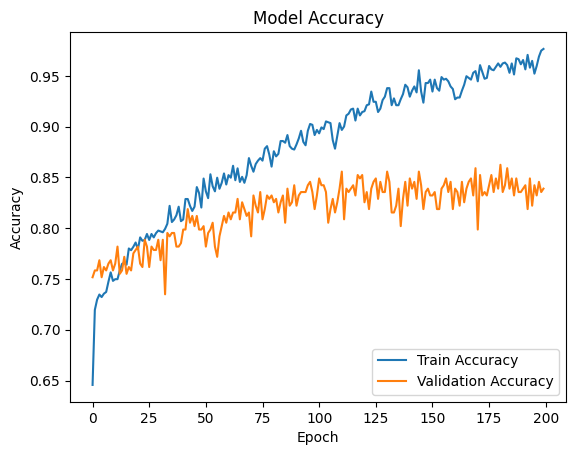

In [47]:
# cnn 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the model
cnn_trained_model = Sequential()
cnn_trained_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_trained_model.add(MaxPooling1D(pool_size=2))
cnn_trained_model.add(Conv1D(64, kernel_size=3, activation='relu'))
cnn_trained_model.add(MaxPooling1D(pool_size=2))
cnn_trained_model.add(Flatten())
cnn_trained_model.add(Dense(64, activation='relu'))
cnn_trained_model.add(Dropout(0.3))
cnn_trained_model.add(Dense(2, activation='softmax'))  # 2 classes

# Compile the model
cnn_trained_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_trained_model.fit(X_train_cnn, y_train_1, epochs=200, batch_size=32, validation_data=(X_test_cnn, y_test_1))

# Evaluate the model
loss, accuracy = cnn_trained_model.evaluate(X_test_cnn, y_test_1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

accuracies_dict["CNN"] = accuracy*100

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


In [38]:
accuracies_dict

{'ANN': 81.8791925907135,
 'LSTM': 81.20805621147156,
 'Bidirectional': 75.16778707504272,
 'Simple RNN': 83.22147727012634,
 'GRU': 81.54362440109253,
 'CNN': 83.55704545974731,
 'Attention models': 64.76510167121887}

In [70]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.2)
X_test.shape

(298, 27)

In [78]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

# One-hot encoding for the target labels
y_train_1 = to_categorical(y_train, num_classes=2)
y_test_1 = to_categorical(y_test, num_classes=2)

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
        self.classes_ = None  # Initialize classes_ attribute

    def fit(self, X, y):
        # Store the unique class labels
        self.classes_ = np.unique(y)
        
        # One-hot encode the labels for Keras
        y_one_hot = np.eye(len(self.classes_))[y]
        self.model.fit(X, y_one_hot, epochs=10, verbose=0)
        return self

    def predict(self, X):
        # Return the class with the highest probability
        return np.argmax(self.model.predict(X), axis=1)

    def predict_proba(self, X):
        # Return probabilities for all classes
        return self.model.predict(X)


# Wrap your models if they are from TensorFlow/PyTorch
ann_model = KerasClassifierWrapper(ann_trained_model)
lstm_model = KerasClassifierWrapper(lstm_trained_model)
rnn_model = KerasClassifierWrapper(rnn_trained_model)
cnn_model = KerasClassifierWrapper(cnn_trained_model)

# Define Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('ANN', ann_model),
        ('LSTM', lstm_model),
        ('RNN', rnn_model),
        ('CNN', cnn_model),
        ('stack', stacking_clf)
    ],
    voting='soft'  # Use 'soft' for probabilities
)

# voting_clf.fit(X_train, y_train_1)
# y_pred = voting_clf.predict(X_test)
# accuracy = accuracy_score(y_test_1, y_pred)
# print(f"Voting Classifier Accuracy: {accuracy:.2f}%")


from sklearn.multioutput import MultiOutputClassifier

# Wrap Voting Classifier with MultiOutputClassifier
multioutput_clf = MultiOutputClassifier(voting_clf)

# Train the classifier
multioutput_clf.fit(X_train, y_train_1)

# Predict and evaluate
y_pred = multioutput_clf.predict(X_test)
accuracy = accuracy_score(y_test_1, y_pred)
print(f"MultiOutput Voting Classifier Accuracy: {accuracy:.2f}%")



8/8 [==============================] - 0s 2ms/step


10/10 [==============================] - 0s 3ms/step
MultiOutput Voting Classifier Accuracy: 0.76%


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.utils import to_categorical
import numpy as np

# Example: Update labels to one-hot encoding
n_classes = 2  # Assuming 6 classes
y_train_1 = to_categorical(y_train, num_classes=n_classes)
y_test_1 = to_categorical(y_test, num_classes=n_classes)

# Define your models with the correct output layer
def build_ann_model(input_dim, n_classes):
    from keras.models import Sequential
    from keras.layers import Dense
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(n_classes, activation='softmax')  # Adjusted output layer
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap models
ann_model = KerasClassifierWrapper(build_ann_model(input_dim=X_train.shape[1], n_classes=n_classes))

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('ANN', ann_model),
        ('LSTM', lstm_model),
        ('RNN', rnn_model),
        ('CNN', cnn_model),
        # ('voting_clf', voting_clf)
    ],
    final_estimator=LogisticRegression(multi_class='multinomial', max_iter=1000)
)

# Fit and evaluate
stacking_clf.fit(X_train, np.argmax(y_train_1, axis=1))  # Use integer labels for scikit-learn
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(np.argmax(y_test_1, axis=1), y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.2f}%")

accuracies_


10/10 [==============================] - 0s 2ms/step
Stacking Classifier Accuracy: 0.85%


In [ ]:
X = df.drop(["Symbol" , "Rating"] , axis=1)
X

,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,operatingCashFlowSalesRatio,payablesTurnover,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Readability
0,-0.824698,-0.060702,-0.068602,-0.147666,-0.069133,-0.039618,-0.042436,-0.542408,-0.045665,-0.023516,...,-0.064850,-0.051142,0.175272,0.913171,0.810471,0.859724,0.165990,0.289363,0.945833,-0.046131
1,-0.824698,-0.058993,-0.066727,-0.122688,-0.070148,-0.038469,-0.042492,-0.543984,-0.045225,0.083880,...,-0.064444,-0.051033,1.513844,0.358279,0.483632,1.224594,0.112018,0.092125,-0.070330,-0.120508
2,-0.824698,-0.060354,-0.067947,-0.142254,-0.067839,-0.040450,-0.043002,-0.552371,-0.045816,-0.101211,...,-0.064104,-0.051620,1.787455,0.042578,0.708041,1.098523,-0.426932,0.090832,-0.443123,-0.089669
3,-0.824698,-0.059260,-0.066409,-0.129210,-0.069725,-0.042511,-0.049447,-0.608807,-0.047332,-0.162053,...,-0.066280,-0.050380,1.826036,1.663444,0.266948,0.842292,-0.360732,-0.076955,-0.314728,0.039130
4,-0.824698,-0.060469,-0.066800,-0.137543,-0.068440,-0.038679,-0.041938,-0.540533,-0.045329,0.022738,...,-0.064877,-0.051197,-0.261966,1.266931,1.156623,-0.209053,0.097338,0.151075,0.872238,0.042758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,-0.247506,-0.062334,-0.060920,-0.103684,-0.058651,-0.031991,-0.033816,0.207196,-0.039406,0.330222,...,-0.060071,-0.053110,0.238057,-0.868995,-0.279192,0.356966,-0.383560,0.233033,-0.364923,-0.100553
1485,-0.247506,-0.070177,-0.072790,-0.132299,-0.073858,-0.053630,-0.052939,0.336376,-0.035662,-0.465358,...,-0.049598,-0.036578,-1.357740,-0.503985,0.514840,-0.726876,0.181169,0.150374,-1.005653,0.200582
1486,0.041090,-0.059908,-0.056577,-0.147423,-0.072486,-0.032349,-0.037929,0.874956,-0.043233,0.072904,...,-0.064140,-0.055555,-2.168651,-2.498032,5.473689,-1.359020,-1.509481,2.194898,-1.752461,0.793781
1487,-1.113294,0.149986,0.106042,1.532614,-0.077536,-0.036264,-0.038264,0.874956,-0.044238,0.228005,...,-0.063698,-0.037754,0.691317,0.058365,0.324231,1.109753,0.138841,-0.593175,0.122976,0.215094


In [ ]:
filename = "binaryclass_without_ticker.csv"
table = pd.read_csv("comparative_analysis.csv")
run_model(X,y , "NLP", table , filename) # nlp extracted features used 

X = X.drop(["Negative","Positive","Uncertainty","Litigious","Strong_Modal","Weak_Modal","Constraining","Readability"] ,axis = 1)

table2 = pd.read_csv(filename)
run_model(X ,y , "No text" , table2 ,filename)   # no nlp extracted features used 


Result2 = pd.read_csv(filename)

In [ ]:
Result1  # binaryclass with ticker

,Model,No text,NLP
0,CatBoost,84.563758,83.221477
1,ExtraTrees-Entr,67.785235,67.785235
2,ExtraTrees-Gini,68.456376,67.449664
3,KNN-Dist,82.214765,76.174497
4,KNN-Unif,79.530201,74.832215
5,LightGBM,84.228188,83.892617
6,LightGBM-Large,88.255034,85.906040
7,LightGBM-XT,83.221477,83.892617
8,RForest-Ent,80.872483,80.201342
9,RForest-Gini,80.201342,80.201342


In [ ]:
Result2 # binaryclass without ticker

,Model,No text,NLP
0,CatBoost,82.885906,83.557047
1,ExtraTrees-Entr,67.114094,66.778523
2,ExtraTrees-Gini,67.449664,66.107383
3,KNN-Dist,80.201342,74.496644
4,KNN-Unif,76.845638,72.483221
5,LightGBM,84.563758,83.557047
6,LightGBM-Large,86.577181,84.563758
7,LightGBM-XT,85.234899,84.228188
8,RForest-Ent,80.872483,81.208054
9,RForest-Gini,80.872483,81.208054
